<a href="https://colab.research.google.com/github/CAVASOL/aiffel_quest/blob/main/DL_quest/main_quest_03/mq3_rock_paper__scissors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Main Quest 03. 인공지능과 가위바위보 하기


### 학습 내용

* 이미 잘 정제된 10개 클래스의 숫자 손글씨 데이터를 분류하는 classifier 만들기
* 정제되지 않은 웹캠 사진으로부터 데이터 만들어보기
* 흑백 사진이 아닌 컬러 사진을 학습하는 classifier 만들기
* 분류하고자 하는 클래스의 개수를 마음대로 조절하기 (10개에서 3개로)

### 학습 목표

* `MNIST Dataset`와 텐서플로우 `Sequential API`를 이용하여 숫자 손글씨 인식기를 만들어 볼 수 있다.
* Sequential Model을 활용하여 딥러닝 네트워크를 설계하고 학습 시킬 수 있다.
* 테스트 데이터로 성능을 확인하고 하이퍼파라미터 조정을 시도하여 성능을 높여볼 수 있다.
* 가위바위보 분류기를 만들기 위한 기본 데이터를 웹캠으로 제작 할 수 있다.

### 목차

**2. 인공지능과 가위바위보 하기**

    1) 인공지능과 가위바위보 하기  

    2) 데이터 준비  
        1) MNIST 숫자 손글씨 Dataset 불러들이기
        2) 학습용 데이터와 시험용 데이터
        3) 데이터 전처리 하기

    3) 딥러닝 네트워크 설계하기  
        1) Sequential Model을 사용해 보자

    4) 딥러닝 네트워크 학습시키기  

    5) 얼마나 잘 만들었는지 확인하기
        1) 테스트 데이터로 성능을 확인해 보자
        2) 어떤 데이터를 잘못 추론했을까?

    6) 더 좋은 네트워크 만들어보기  


**3. 미니 프로젝트: 가위바위보 분류기를 만들자**  

    1) 미니 프로젝트: 가위바위보 분류기를 만들자
        1) 라이브러리 버전 확인하기
        2) 데이터 준비하기
        3) 데이터 불러오기 & 이미지 데이터 크기 조정하기
        4) 딥러닝 네트워크 설계하기
        5) 딥러닝 네트워크 학습시키기
        6) 얼마나 잘 만들었는지 확인하기: 테스트
        7) 더 좋은 네트워크 만들어보기
        
    2) test_accuracy를 높이기 위해 설정한 몇 가지 시도

## 2. 인공지능과 가위바위보 하기

### 2-1. 인공지능과 가위바위보 하기

**Q. 2는 5보다 위에 있고 0은 2보다 큽니다. 또한, 5는 0보다 큽니다. 이것은 무엇일까요?**

```
가위바위보!
```

### 2-2. 데이터 준비

**MNIST 숫자 손글씨 Dataset 불러들이기**

In [ ]:
# TensorFlow의 표준 API인 tf.keras의 Sequential API를 이용하여 숫자 손글씨 인식기 만들기
# TF 2.6.0

import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt
import os


print(tf.__version__)

mnist = keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

print(len(x_train))

2.6.0
60000


**Q. 숫자 손글씨 이미지의 크기는 무엇일까요? "nxn"(n은 정수)의 형태로.**

```
28x28
```

**Q. MNIST dataset에는 총 몇 장의 손글씨 이미지가 있을까요?**

```
총 70000만 장의 손글씨 이미지 데이터가 있으며, 그 중 60000개는 훈련 데이터 10000개는 테스트 데이터로 활용합니다.
```

**Q. 학습용 데이터(training set)은 대략 몇명의 손글씨가 들어있을까요?**

```
250명
```

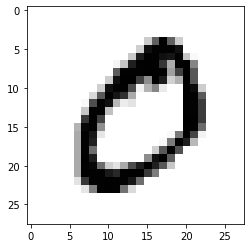

In [ ]:
# x_train 행렬의 2번째 값 확인

plt.imshow(x_train[1],cmap=plt.cm.binary)
plt.show()

In [ ]:
# y_train 행렬의 2번째 값 확인

print(y_train[1])

0


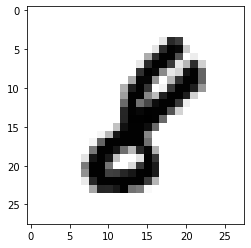

10002 번째 이미지의 숫자는 바로  8 입니다.


In [ ]:
index=10001
plt.imshow(x_train[index],cmap=plt.cm.binary)
plt.show()
print( (index+1), '번째 이미지의 숫자는 바로 ',  y_train[index], '입니다.')

**학습용 데이터와 시험용 데이터**

In [ ]:
# Train data

print(x_train.shape)

(60000, 28, 28)


훈련 데이터로서 28x28 크기의 숫자 이미지가 60,000장이 있습니다.

In [ ]:
# Test data

print(x_test.shape)

(10000, 28, 28)


시험 데이터로서 28x28 크기의 숫자 이미지가 10,000장이 있습니다.

**Q. 언제 검증용 데이터(validation set)를 사용하나요?**

```
기계학습의 훈련 과정 중 학습의 진행 상황, 과적합 여부, 학습 중단의 필요 유무 등을 확인하기 위해 사용해요.
```

**Q. 교차 검증(cross validation) 기법은 무엇인가요?**

```
기계 학습 모델의 성능을 평가하고 일반화 성능을 향상시키는데 사용되는 기술이에요. 모델의 성능을 평가하기 위한 목적으로 사용하고, 모델이 훈련 데이터에 과적합(오버피팅)되는지 여부를 확인할 수 있어요. 그러나 데이터가 많은 경우, 시간이 다소 오래 걸린다는 단점이 있어요.
```

**데이터 전처리 하기**

In [ ]:
# 숫자 손글씨 이미지의 실제 픽셀 값

print('최소값:',np.min(x_train), ' 최대값:',np.max(x_train))

최소값: 0  최대값: 255


In [ ]:
# 입력 데이터  0과 1 사이 값으로 정규화

x_train_norm, x_test_norm = x_train / 255.0, x_test / 255.0
print('최소값:',np.min(x_train_norm), ' 최대값:',np.max(x_train_norm))

최소값: 0.0  최대값: 1.0


### 2-3. 딥러닝 네트워크 설계하기

**Sequential Model을 사용해 보자**

In [ ]:
# tf.keras의 Sequential API를 이용하여 LeNet 설계

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28, 28, 1))) # 이미지의 특징과 입력 이미지의 형태
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(32, (3,3), activation='relu')) # 이미지의 특징
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation='relu')) # 분류기 알고리즘의 복잡도
model.add(keras.layers.Dense(10, activation='softmax')) # 최종 분류기의 class 수

print('Model에 추가된 Layer 개수: ', len(model.layers))

Model에 추가된 Layer 개수:  7


* **Conv2D** 레이어의 첫 번째 인자는 `사용하는 이미지 특징의 수` 입니다. 여기서는 16과 32를 사용했습니다. 가장 먼저 16개의 이미지 특징을, 그 뒤에 32개의 이미지 특징씩을 고려하겠다는 뜻입니다. 우리의 숫자 이미지는 사실 매우 단순한 형태의 이미지입니다. 만약 강아지 얼굴 사진이 입력 이미지라면 훨씬 디테일하고 복잡한 영상일 것입니다. 그럴 경우에는 이 특징 숫자를 늘려주는 것을 고려해 볼 수 있습니다.  


* **Dense** 레이어의 첫 번째 인자는 분류기에 `사용되는 뉴런의 숫자` 입니다. 이 값이 클수록 보다 복잡한 분류기를 만들 수 있습니다. 10개의 숫자가 아닌 알파벳을 구분하고 싶다면, 대문자 26개, 소문자 26개로 총 52개의 클래스를 분류해 내야 합니다. 그래서 32보다 큰 64, 128 등을 고려해 볼 수 있을 것입니다.  


* 마지막 Dense 레이어의 뉴런 숫자는 결과적으로 분류해 내야 하는 `최종 클래스 수`로 지정하면 됩니다. 숫자 인식기에서는 10, 알파벳 인식기에서는 52가 되겠지요.

**Q. 입력 이미지의 형태 input_shape=(28, 28, 1) 코드가 의미하는 바는 무엇일까요?**

```
이미지의 입력 형태로서 높이 28 너비 28 채널 1개의 이미지라는 의미입니다.
```

In [ ]:
# Model 확인하기

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 32)                25632     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                3

### 2-4. 딥러닝 네트워크 학습시키기

In [ ]:
# 입력 데이터 형태 재구성하기: 채널 추가하기

print(f"Before Reshape - x_train_norm shape: {x_train_norm.shape}")
print(f"Before Reshape - x_test_norm shape: {x_test_norm.shape}")

x_train_reshaped=x_train_norm.reshape( -1, 28, 28, 1)  # 데이터갯수에 -1을 쓰면 reshape 시 자동 계산
x_test_reshaped=x_test_norm.reshape( -1, 28, 28, 1)

print(f"After Reshape - x_train_reshaped shape: {x_train_reshaped.shape}")
print(f"After Reshape - x_test_reshaped shape: {x_test_reshaped.shape}")

Before Reshape - x_train_norm shape: (60000, 28, 28)
Before Reshape - x_test_norm shape: (10000, 28, 28)
After Reshape - x_train_reshaped shape: (60000, 28, 28, 1)
After Reshape - x_test_reshaped shape: (10000, 28, 28, 1)


In [ ]:
# 학습 데이터로 딥러닝 네트워크 학습 시키기

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train_reshaped, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 75s 39ms/step - loss: 0.1844 - accuracy: 0.9444
Epoch 2/10
1875/1875 [==============================] - 74s 39ms/step - loss: 0.0625 - accuracy: 0.9812
Epoch 3/10
1875/1875 [==============================] - 74s 39ms/step - loss: 0.0456 - accuracy: 0.9856
Epoch 4/10
1875/1875 [==============================] - 73s 39ms/step - loss: 0.0353 - accuracy: 0.9891
Epoch 5/10
1875/1875 [==============================] - 72s 38ms/step - loss: 0.0279 - accuracy: 0.9912
Epoch 6/10
1875/1875 [==============================] - 73s 39ms/step - loss: 0.0226 - accuracy: 0.9928
Epoch 7/10
1875/1875 [==============================] - 73s 39ms/step - loss: 0.0192 - accuracy: 0.9937
Epoch 8/10
1875/1875 [==============================] - 73s 39ms/step - loss: 0.0170 - accuracy: 0.9941
Epoch 9/10
1875/1875 [==============================] - 73s 39ms/step - loss: 0.0136 - accuracy: 0.9955
Epoch 10/10
1875/1875 [==============================] - 45s 24m

학습이 진행됨에 따라 epoch 별로 어느 정도 인식 정확도(accuracy)가 올라가는지 확인할 수 있습니다.  
인식 정확도가 0.9444에서 0.9961까지 매우 높게 올라가며, 9 epoch 정도부터는 인식률의 상승이 미미합니다.  
10 epoch 정도로 학습을 시키면 충분할 것 같네요.

### 2-5. 얼마나 잘 만들었는지 확인하기

**테스트 데이터로 성능을 확인해 보자**

In [ ]:
# 테스트 데이터로 성능 확인

test_loss, test_accuracy = model.evaluate(x_test_reshaped, y_test, verbose=2)
print(f"test_loss: {test_loss}")
print(f"test_accuracy: {test_accuracy}")

313/313 - 2s - loss: 0.0329 - accuracy: 0.9903
test_loss: 0.0328618586063385
test_accuracy: 0.9902999997138977


학습할 때마다 test_loss와 test_accuracy도 변동 됨을 알 수 있습니다.

**어떤 데이터를 잘못 추론했을까?**

model.evaluate() 대신 model.predict()를 사용하면 model이 입력값을 보고 실제로 추론한 확률분포를 출력할 수 있습니다.  
우리가 만든 model이란 사실 10개의 숫자 중 어느 것일지에 대한 확률값을 출력하는 함수입니다.  
이 함수의 출력값, 즉 확률값이 가장 높은 숫자가 바로 model이 추론한 숫자가 되는 거죠.

In [ ]:
predicted_result = model.predict(x_test_reshaped)  # model이 추론한 확률값
predicted_labels = np.argmax(predicted_result, axis=1)

idx=0  # 1번째 x_test
print('model.predict() 결과 : ', predicted_result[idx])
print('model이 추론한 가장 가능성이 높은 결과 : ', predicted_labels[idx])
print('실제 데이터의 라벨 : ', y_test[idx])

model.predict() 결과 :  [2.52045953e-17 6.99740309e-12 4.75359162e-12 1.04478835e-10
 1.07324504e-14 4.80373459e-14 1.13350989e-18 1.00000000e+00
 7.36783308e-15 3.12457016e-09]
model이 추론한 가장 가능성이 높은 결과 :  7
실제 데이터의 라벨 :  7


이 모델은 입력한 이미지가 숫자 7이라는 걸 아주 확신하고 있네요? 정말 `7` 인지 확인해 봅시다.

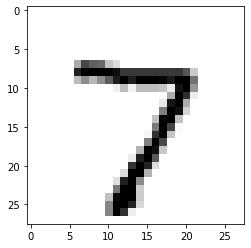

In [ ]:
plt.imshow(x_test[idx],cmap=plt.cm.binary)
plt.show()

그렇다면, 모델이 추론해 낸 숫자와 실제 라벨의 값이 다른 경우는 어떤 경우일까요?

예측확률분포: [9.5154750e-01 1.6923180e-09 1.2876356e-07 4.4030376e-06 5.7151558e-12
 4.8298780e-02 1.4898444e-04 1.2103810e-07 4.5000686e-08 7.9837088e-09]
라벨: 5, 예측결과: 0


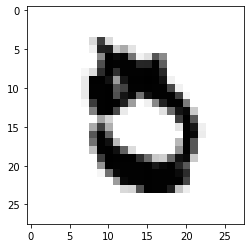

예측확률분포: [7.9479292e-03 6.3938023e-06 9.3906194e-10 3.9874254e-10 7.4617255e-09
 1.2981172e-07 8.5088759e-12 9.0553182e-01 1.8389053e-10 8.6513683e-02]
라벨: 9, 예측결과: 7


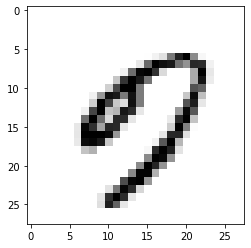

예측확률분포: [3.4482645e-07 4.3992298e-08 3.9840972e-07 2.9605917e-05 2.2370384e-07
 4.2326110e-06 3.0737544e-11 6.7353046e-01 2.0811814e-09 3.2643473e-01]
라벨: 9, 예측결과: 7


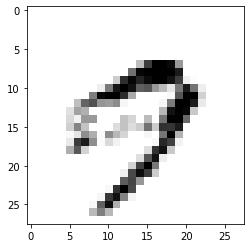

예측확률분포: [6.5824461e-06 4.6776148e-07 7.5385935e-05 1.3794273e-07 1.0966273e-01
 3.5596449e-07 1.3394008e-08 1.1749966e-05 3.6474565e-04 8.8987786e-01]
라벨: 4, 예측결과: 9


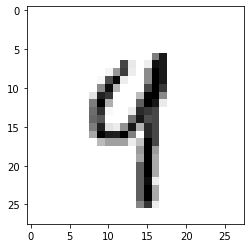

예측확률분포: [3.01776803e-03 1.73960252e-05 9.18137448e-06 2.85098540e-05
 2.83275070e-09 1.13434435e-05 7.20443785e-01 5.67960713e-11
 2.76464045e-01 7.94995594e-06]
라벨: 8, 예측결과: 6


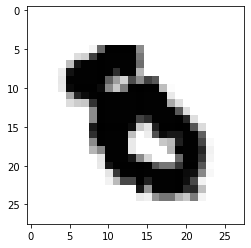

In [ ]:
import random
wrong_predict_list=[]
for i, _ in enumerate(predicted_labels):
    # i번째 test_labels과 y_test이 다른 경우
    if predicted_labels[i] != y_test[i]:
        wrong_predict_list.append(i)

# wrong_predict_list에서 랜덤하게 5개만 골라보자
samples = random.choices(population=wrong_predict_list, k=5)

for n in samples:
    print("예측확률분포: " + str(predicted_result[n]))
    print("라벨: " + str(y_test[n]) + ", 예측결과: " + str(predicted_labels[n]))
    plt.imshow(x_test[n], cmap=plt.cm.binary)
    plt.show()

틀린 경우를 살펴보면 모델도 추론 결과에 대한 확신도가 낮고, 매우 혼란스러워 한다는 것을 알 수 있습니다.  
모델의 추론 결과를 시각화하여 살펴보는 것은 향후 모델의 성능 개선에 도움이 되는 아이디어를 얻을 수 있는 좋은 방법 중 하나입니다.  

### 2-6. 더 좋은 네트워크 만들어 보기

In [ ]:
# 성능 올리기: 하이퍼파라미터 조정하기

n_channel_1=32
n_channel_2=64
n_dense=64
n_train_epoch=10

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28, 28, 1)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# 모델 훈련
model.fit(x_train_reshaped, y_train, epochs=n_train_epoch)

# 모델 시험
test_loss, test_accuracy = model.evaluate(x_test_reshaped, y_test, verbose=2)
print(f"test_loss: {test_loss} ")
print(f"test_accuracy: {test_accuracy}")

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                102464    
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

**Q. 하이퍼파라미터를 바꾸어가면서 시험용 데이터(x_test)에 대한 인식률을 확인해 봅시다.  
최고로 높은 점수를 얻은 네트워크 모델 코드와 그 때의 시험용 데이터 인식률 값을 올려주세요.**

```
n_channel_1=32 / n_channel_2=64 / n_dense=64 / n_train_epoch=10
```

## 3. 미니 프로젝트: 가위바위보 분류기를 만들자

### 3-1. 미니 프로젝트 : 가위바위보 분류기를 만들자

**라이브러리 버전 확인하기**

In [ ]:
# Lib

import tensorflow as tf
import numpy as np

print(tf.__version__)
print(np.__version__)

2.6.0
1.22.2


**데이터 준비하기**

구글의 teachable machine 활용하여 `Rock Paper Scissors` 이미지 데이터 만들고, LMS에 저장하기

```
aiffel
└── rock_scissor_paper
    ├── rock
        └── rock.zip
    ├── scissor
        └── scissor.zip
    └── paper
        └── paper.zip
```

**Q. 다운로드 받은 이미지는 크기는 무엇일까요? "nxn"(n은 정수)의 형태로.**

```
224x224
```

**데이터 불러오기 & 이미지 데이터 크기 조정하기**

In [ ]:
from PIL import Image
import glob
import os

print("PIL 라이브러리 import 완료!")

PIL 라이브러리 import 완료!


In [ ]:
# 가위 이미지 28x28 사이즈로 변경

def resize_images(img_path):
    images=glob.glob(img_path + "/*.jpg")

    print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 변경
    target_size=(28,28)
    for img in images:
        old_img=Image.open(img)
        new_img=old_img.resize(target_size,Image.ANTIALIAS)
        new_img.save(img, "JPEG")

    print(len(images), " images resized.")

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/scissor"
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

200  images to be resized.
200  images resized.
가위 이미지 resize 완료!


In [ ]:
def resize_images(img_path):
    images=glob.glob(img_path + "/*.jpg")
    print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
    target_size=(28,28)
    for img in images:
        old_img=Image.open(img)
        new_img=old_img.resize(target_size,Image.ANTIALIAS)
        new_img.save(img, "JPEG")

    print(len(images), " images resized.")

# 바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/rock"
resize_images(image_dir_path)

print("바위 이미지 resize 완료!")

200  images to be resized.
200  images resized.
바위 이미지 resize 완료!


In [ ]:
def resize_images(img_path):
    images=glob.glob(img_path + "/*.jpg")
    print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
    target_size=(28,28)
    for img in images:
        old_img=Image.open(img)
        new_img=old_img.resize(target_size,Image.ANTIALIAS)
        new_img.save(img, "JPEG")

    print(len(images), " images resized.")

# 보 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/paper"
resize_images(image_dir_path)

print("보 이미지 resize 완료!")

200  images to be resized.
200  images resized.
보 이미지 resize 완료!


In [ ]:
# 가위, 바위, 보 데이터를 읽을 수 있는 load_data() 함수 만들기

import numpy as np

def load_data(img_path, number_of_data=600):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1

    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1

    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper"
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

# 데이터 섞고, 검증 데이터 분리하기
def shuffle_dataset(x_train, y_train):
    permutation = np.random.permutation(x_train.shape[0])
    x_train = x_train[permutation,:] if x_train.ndim == 2 else x_train[permutation,:,:,:]
    y_train = y_train[permutation]

    return x_train, y_train

x_train, y_train = shuffle_dataset(x_train, y_train)
validation_rate = 0.20
validation_num = int(x_train.shape[0] * validation_rate)

x_val = x_train[:validation_num]
y_val = y_train[:validation_num]

x_train = x_train[validation_num:]
y_train = y_train[validation_num:]

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 600 입니다.
x_train shape: (480, 28, 28, 3)
y_train shape: (480,)


라벨:  0


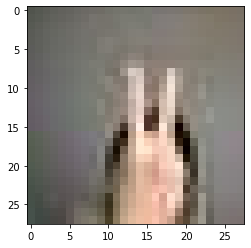

In [ ]:
# 이미지 데이터 확인하기

import matplotlib.pyplot as plt

plt.imshow(x_train[0])
print('라벨: ', y_train[0])

**딥러닝 네트워크 설계하기**

**Q. 모델의 입력/출력부에 특히 유의하여 모델을 직접 만들어 보세요. 가위바위보 데이터셋은 MNIST 데이터셋과 어떤 점이 달라졌나요?**

```
MNIST 데이터셋의 최종 분류기 class 수는 10이었고, 가위바위보 데이터셋의 최종 분류기 class 수는 3입니다.
```

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(256, (3, 3), activation='relu', input_shape=(28, 28, 3))) # 이미지의 특징과 입력 이미지의 형태
model.add(keras.layers.MaxPool2D(2, 2))
model.add(keras.layers.Conv2D(512, (3, 3), activation='relu')) # 이미지의 특징
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(512, activation='relu')) # 분류기 알고리즘의 복잡도
model.add(keras.layers.Dense(3, activation='softmax')) # 최종 분류기의 class 수

print('Model에 추가된 Layer 개수: ', len(model.layers))

model.summary()

Model에 추가된 Layer 개수:  7
Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_46 (Conv2D)           (None, 26, 26, 256)       7168      
_________________________________________________________________
max_pooling2d_46 (MaxPooling (None, 13, 13, 256)       0         
_________________________________________________________________
conv2d_47 (Conv2D)           (None, 11, 11, 512)       1180160   
_________________________________________________________________
max_pooling2d_47 (MaxPooling (None, 5, 5, 512)         0         
_________________________________________________________________
flatten_23 (Flatten)         (None, 12800)             0         
_________________________________________________________________
dense_46 (Dense)             (None, 512)               6554112   
_________________________________________________________________
dense_47 (Dense)             

**딥러닝 네트워크 학습시키기**

**Q. model.compile()과 model.fit()을 사용하여 딥러닝 네트워크 학습시키기**

In [ ]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train, y_train, epochs=8)

Epoch 1/8
15/15 [==============================] - 15s 992ms/step - loss: 80.6893 - accuracy: 0.3833
Epoch 2/8
15/15 [==============================] - 15s 981ms/step - loss: 0.6541 - accuracy: 0.7292
Epoch 3/8
15/15 [==============================] - 15s 973ms/step - loss: 0.4645 - accuracy: 0.8292
Epoch 4/8
15/15 [==============================] - 14s 956ms/step - loss: 0.2387 - accuracy: 0.9167
Epoch 5/8
15/15 [==============================] - 15s 979ms/step - loss: 0.1165 - accuracy: 0.9521
Epoch 6/8
15/15 [==============================] - 14s 962ms/step - loss: 0.0448 - accuracy: 0.9875
Epoch 7/8
15/15 [==============================] - 14s 957ms/step - loss: 0.0263 - accuracy: 0.9896
Epoch 8/8
15/15 [==============================] - 14s 965ms/step - loss: 0.0102 - accuracy: 1.0000


학습이 진행됨에 따라 epoch 별로 어느 정도 인식 정확도(accuracy)가 올라가는지 확인할 수 있습니다.  
인식 정확도가 0.3042에서 5 epoch 이르러 1.0이 나옵니다. 과적합이 발생한 것 같아요!

**얼마나 잘 만들었는지 확인하기(테스트)**

```
# Test data 경로 설정

mkdir -p ~/aiffel/rock_scissor_paper/test
```

**테스트 데이터 이미지 크기 조정하기**

In [ ]:
def resize_images(img_path):
    images=glob.glob(img_path + "/*.jpg")

    print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 변경
    target_size=(28,28)
    for img in images:
        old_img=Image.open(img)
        new_img=old_img.resize(target_size,Image.ANTIALIAS)
        new_img.save(img, "JPEG")

    print(len(images), " images resized.")

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/scissor"
resize_images(image_dir_path)

print("가위 테스트 이미지 resize 완료!")

100  images to be resized.
100  images resized.
가위 테스트 이미지 resize 완료!


In [ ]:
def resize_images(img_path):
    images=glob.glob(img_path + "/*.jpg")
    print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
    target_size=(28,28)
    for img in images:
        old_img=Image.open(img)
        new_img=old_img.resize(target_size,Image.ANTIALIAS)
        new_img.save(img, "JPEG")

    print(len(images), " images resized.")

# 바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/rock"
resize_images(image_dir_path)

print("바위 테스트 이미지 resize 완료!")

100  images to be resized.
100  images resized.
바위 테스트 이미지 resize 완료!


In [ ]:
def resize_images(img_path):
    images=glob.glob(img_path + "/*.jpg")
    print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
    target_size=(28,28)
    for img in images:
        old_img=Image.open(img)
        new_img=old_img.resize(target_size,Image.ANTIALIAS)
        new_img.save(img, "JPEG")

    print(len(images), " images resized.")

# 보 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/paper"
resize_images(image_dir_path)

print("보 테스트 이미지 resize 완료!")

100  images to be resized.
100  images resized.
보 테스트 이미지 resize 완료!


In [ ]:
# 테스트 데이터 x_test, y_test 만들기

def load_data(img_path, number_of_data=300):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1

    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1

    print("테스트 데이터(x_test)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test"
(x_test, y_test)=load_data(image_dir_path)
x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화

print(x_train.shape)
print(x_test.shape)

테스트 데이터(x_test)의 이미지 개수는 300 입니다.
(480, 28, 28, 3)
(300, 28, 28, 3)


In [ ]:
# 위에서 훈련시킨 모델을 사용하여 test_accuracy를 측정

test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print(f"test_loss: {test_loss}")
print(f"test_accuracy: {test_accuracy}")

10/10 - 2s - loss: 3.0493 - accuracy: 0.3900
test_loss: 3.0492687225341797
test_accuracy: 0.38999998569488525


손실 3.04에 인식 정확도(test_accuracy)는 무려 0.3899! 엉망진창이네요.

In [ ]:
predicted_result = model.predict(x_test)  # model이 추론한 확률값
predicted_labels = np.argmax(predicted_result, axis=1)

idx=0  # 1번째 x_test
print('model.predict() 결과 : ', predicted_result[idx])
print('model이 추론한 가장 가능성이 높은 결과 : ', predicted_labels[idx])
print('실제 데이터의 라벨 : ', y_test[idx])

model.predict() 결과 :  [1.5080101e-05 9.9121557e-05 9.9988580e-01]
model이 추론한 가장 가능성이 높은 결과 :  2
실제 데이터의 라벨 :  0


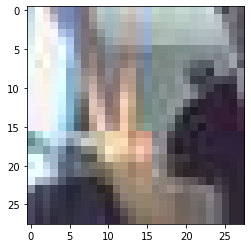

In [ ]:
plt.imshow(x_test[idx],cmap=plt.cm.binary)
plt.show()

**더 좋은 네트워크 만들어보기**

In [ ]:
# 성능 올리기: 하이퍼파라미터 조정하기

import tensorflow as tf
from tensorflow import keras

n_channel_1 = 32
n_channel_2 = 64
n_dense = 64
n_train_epoch = 20

model = keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3, 3), activation='relu', input_shape=(28, 28, 3)))
model.add(keras.layers.MaxPool2D(2, 2))
model.add(keras.layers.Conv2D(n_channel_2, (3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()

datagen = keras.preprocessing.image.ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    vertical_flip=False
)

lr_schedule = keras.optimizers.schedules.ExponentialDecay(initial_learning_rate=1e-2,
                                                          decay_steps=10000,
                                                          decay_rate=0.9)
optimizer = keras.optimizers.Adam(learning_rate=lr_schedule)

model.compile(optimizer=optimizer,
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# 모델 훈련
model.fit(x_train, y_train, epochs=n_train_epoch)

# 모델 시험
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print(f"test_loss: {test_loss} ")
print(f"test_accuracy: {test_accuracy}")

Model: "sequential_77"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_154 (Conv2D)          (None, 26, 26, 32)        896       
_________________________________________________________________
max_pooling2d_154 (MaxPoolin (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_155 (Conv2D)          (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_155 (MaxPoolin (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_77 (Flatten)         (None, 1600)              0         
_________________________________________________________________
dense_154 (Dense)            (None, 64)                102464    
_________________________________________________________________
dropout_70 (Dropout)         (None, 64)              

### 3-2. test_accuracy를 높이기 위해 설정한 몇 가지 시도


**1. 채널 조정 및 더 많은 횟수의 에포크 시도**

```
n_channel_1 = 256   -->   n_channel_1 = 32
n_channel_2 = 512   -->   n_channel_2 = 64
n_dense = 512       -->   n_dense = 64
n_train_epoch = 8   -->   n_train_epoch = 20
```

**2. Dropout 레이어 추가**

```
model.add(keras.layers.Dropout(0.5))
```

**3. 학습률 스케줄링 설정**

```
lr_schedule = keras.optimizers.schedules.ExponentialDecay(initial_learning_rate=1e-7,
                                                          decay_steps=10000,
                                                          decay_rate=0.9)
optimizer = keras.optimizers.Adam(learning_rate=lr_schedule)

model.compile(optimizer=optimizer,
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
```